In [34]:
import cv2
label_path = 'dataset/InteriorNet_mini/3FO4J6DV38EC_Guest_room/label0/data/10_nyu.png'
# label_path = 'dataset/cityscapes/gtFine/train/aachen/aachen_000000_000019_gtFine_labelTrainIds.png'
label = cv2.imread(label_path, 0)

(480, 640) [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


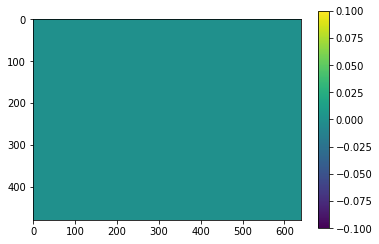

In [36]:
print(label.shape, label)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(label)
plt.colorbar()
plt.show()

(480, 640) [[4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 1.5259022e-05
  1.5259022e-05 1.5259022e-05]
 [4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 1.5259022e-05
  1.5259022e-05 1.5259022e-05]
 [4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 1.5259022e-05
  1.5259022e-05 1.5259022e-05]
 ...
 [4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 3.8147555e-04
  3.8147555e-04 3.8147555e-04]
 [4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 3.8147555e-04
  3.8147555e-04 3.8147555e-04]
 [4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 3.8147555e-04
  3.8147555e-04 3.8147555e-04]]


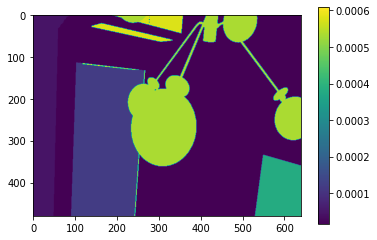

In [33]:
label = plt.imread(label_path)
print(label.shape, label)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(label)
plt.colorbar()
plt.show()

(480, 640)


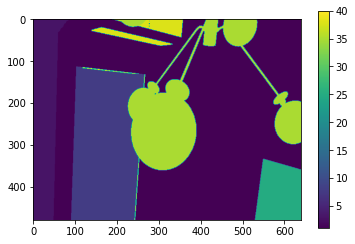

In [42]:
from PIL import Image
import numpy as np
label = np.array(Image.open(label_path).convert('L'))
print(label.shape)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(label)
plt.colorbar()
plt.show()